(3075072, 3)
[[48.         51.          3.          0.47450981  0.47450981  0.16078432]
 [48.         51.          3.          0.47450981  0.47058824  0.15294118]
 [48.         51.          3.          0.47450981  0.47058824  0.15686275]
 ...
 [48.         51.          3.          0.49411765  0.48627451  0.15686275]
 [48.         51.          3.          0.47450981  0.47058824  0.15294118]
 [48.         51.          3.          0.47450981  0.47450981  0.16078432]]
(36049, 6)
[[  6.          47.         104.           0.56078434   0.51764709
    0.30588236]
 [  6.          48.         104.           0.25490198   0.61176473
    0.18039216]
 [  7.          46.         104.           0.39607844   0.61176473
    0.48235294]
 ...
 [ 84.          42.         104.           0.43529412   0.61176473
    0.32549021]
 [ 85.          40.         104.           0.89019608   0.78823531
    0.58039218]
 [ 85.          41.         104.           0.88627452   0.7764706
    0.5529412 ]]


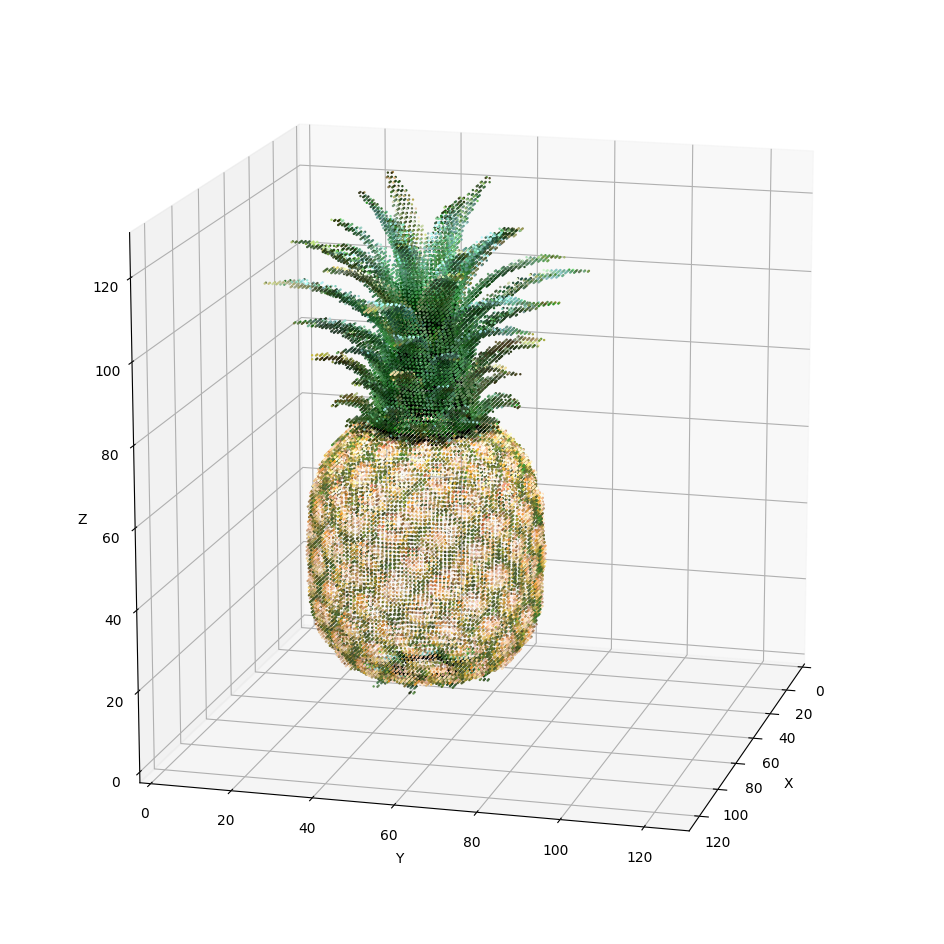

In [100]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#これ9*9*9になってるから直す（色確認してから）
b = np.loadtxt('C:\\Users\\ku-admin\\Desktop\\blender-windows64\\output_pineapple.txt')

virtex_all = np.round(b[:,0:3])
print(virtex_all.shape)
virtex_color_all = np.append(virtex_all, b[:,3:6], axis = 1)
print(virtex_color_all)

# numpy配列をpandas DataFrameに変換
df = pd.DataFrame(virtex_color_all)
# 1~3列目を基準にグループ化し、4~6列目について平均値を計算します
df_grouped = df.groupby(df.iloc[:,0:3].apply(tuple, axis=1)).first()
# pandas DataFrameをnumpy配列に再変換
virtex_color = df_grouped.values
# 結果を表示
print(virtex_color.shape)
colors_seikika = virtex_color[:,3:6]

colors = colors_seikika * 255
colors = np.round(colors)

print(virtex_color)

# Figureを追加
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,128)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(virtex_color[:,0], virtex_color[:,1], virtex_color[:,2], s = 0.5, c = colors_seikika, alpha = 1)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")

plt.show()

In [95]:
#量子化テーブルの作成
import numpy as np

bairituY = 8
bairituC = 0.25
dc = 50

tableY = np.zeros((8,8))
ryoshi_Y = np.array([[dc,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

tableY = (ryoshi_Y*bairituY).astype(np.int32)
tableY[tableY < 1] = 1
print(tableY)

tableC = np.zeros((8,8))
ryoshi_C = np.array([[dc*8,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])


tableC = (ryoshi_C*bairituC).astype(np.int32)
tableC[tableC<1] =1
print(tableC)

[[400  88  80 128 192 320 408 488]
 [ 96  96 112 152 208 464 480 440]
 [112 104 128 192 320 456 552 448]
 [112 136 176 232 408 696 640 496]
 [144 176 296 448 544 872 824 616]
 [192 280 440 512 648 832 904 736]
 [392 512 624 696 824 968 960 808]
 [576 736 760 784 896 800 824 792]]
[[100   4   6  11  24  24  24  24]
 [  4   5   6  16  24  24  24  24]
 [  6   6  14  24  24  24  24  24]
 [ 11  16  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24]]


In [99]:
#DCTIDCT

import numpy as np
import matplotlib.pyplot as plt

#コサイン定数の定義

C13 = -0.831469612
C9 = -0.195090322
C5 = 0.555570233
"""
C13 = -1
C9 = -0.25
C5 = 0.5"""
#シフト演算のみでできるように
#課題：ハードウェアでやる場合の誤差伝搬をどう少なくするか

C5_inv = 1/C5
C9_inv = 1/C9
C13_inv = 1/C13

X_out1 = np.zeros((8,8,8))
X_out2 = np.zeros((8,8,8))
X_out3 = np.zeros((8,8,8))
x_in2 = np.zeros((8,8,8))
x_in3 = np.zeros((8,8,8))
x_in3i = np.zeros((8,8,8))
x_in2i = np.zeros((8,8,8))
x_in1i = np.zeros((8,8,8))
X_out1i = np.zeros((8,8,8))
X_out2i = np.zeros((8,8,8))

def butterfly_1(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[2] + x[3]
    X[2] = x[0] - x[1]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[6] + x[7]
    X[6] = x[4] - x[5]
    X[7] = x[6] - x[7]
    return X

def butterfly_2(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[4] + x[5]
    X[2] = x[2] + x[3]
    X[3] = x[6] + x[7]
    X[4] = x[0] - x[1]
    X[5] = x[4] - x[5]
    X[6] = x[2] - x[3]
    X[7] = x[6] - x[7]
    return X

def butterfly_3(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[0] - x[1]
    X[2] = x[2] + x[3]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[4] - x[5]
    X[6] = x[6] + x[7]
    X[7] = x[6] - x[7]
    return X

def cosine(x):
    X = np.zeros(8)
    X[0] = x[0]
    X[1] = x[1]*C13
    X[2] = x[2]*C9
    X[3] = x[3]*C9*C13
    X[4] = x[4]*C5
    X[5] = x[5]*C13*C5
    X[6] = x[6]*C9*C5
    X[7] = x[7]*C13*C9*C5
    return X

def Ibutterfly_1(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = 0.5*X[0] + 0.5*X[2]
    x[1] = 0.5*X[0] - 0.5*X[2]
    x[2] = 0.5*X[1] + 0.5*X[3]
    x[3] = 0.5*X[1] - 0.5*X[3]
    x[4] = 0.5*X[4] + 0.5*X[6]
    x[5] = 0.5*X[4] - 0.5*X[6]
    x[6] = 0.5*X[5] + 0.5*X[7]
    x[7] = 0.5*X[5] - 0.5*X[7]
    return x

def Ibutterfly_2(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = 0.5*X[0] + 0.5*X[4]
    x[1] = 0.5*X[0] - 0.5*X[4]
    x[2] = 0.5*X[2] + 0.5*X[6]
    x[3] = 0.5*X[2] - 0.5*X[6]
    x[4] = 0.5*X[1] + 0.5*X[5]
    x[5] = 0.5*X[1] - 0.5*X[5]
    x[6] = 0.5*X[3] + 0.5*X[7]
    x[7] = 0.5*X[3] - 0.5*X[7]
    return x

def Ibutterfly_3(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = 0.5*X[0] + 0.5*X[1]
    x[1] = 0.5*X[0] - 0.5*X[1]
    x[2] = 0.5*X[2] + 0.5*X[3]
    x[3] = 0.5*X[2] - 0.5*X[3]
    x[4] = 0.5*X[4] + 0.5*X[5]
    x[5] = 0.5*X[4] - 0.5*X[5]
    x[6] = 0.5*X[6] + 0.5*X[7]
    x[7] = 0.5*X[6] - 0.5*X[7]
    return x

def inv_cosine(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = X[0]
    x[1] = X[1] * C13_inv
    x[2] = X[2] * C9_inv
    x[3] = X[3] * (C9_inv * C13_inv)
    x[4] = X[4] * C5_inv
    x[5] = X[5] * (C5_inv * C13_inv)
    x[6] = X[6] * (C5_inv * C9_inv)
    x[7] = X[7] * (C5_inv * C9_inv * C13_inv)
    return x

def DCT1(x_in):
    X_1 = butterfly_1(x_in)
    X_2 = butterfly_2(X_1)
    X_3 = butterfly_3(X_2)
    X_out = cosine(X_3)
    return X_out

def IDCT1(X_out):
    X_3 = inv_cosine(X_out)
    X_2 = Ibutterfly_3(X_3)
    X_1 = Ibutterfly_2(X_2)
    x = Ibutterfly_1(X_1)
    return x

def DCT(x_in):
    for i in range(8):
        x = x_in[i]
        X_out = DCT1(x)
        x_in[i] = X_out
    return x_in
    
def IDCT(X_out):
    for i in range(8):
        X = X_out[i]
        x = IDCT1(X_out)
        X_out[i] = x
    return X_out


def tenchi2D(x):
    x = np.transpose(x)
    return x


def DCT_2D(x_in1, X_out1, x_in2, X_out2):
    # ｘ方向   
    for i in range(8):
        X_out1[i] = DCT1(x_in1[i])
    #転置
    x_in2 = tenchi2D(X_out1)
    #ｙ方向
    for i in range(8):
        X_out2[i] = DCT1(x_in2[i])
    return X_out2

    
def IDCT_2D(X_out2i, x_in2i, X_out1i, x_in1i, n):
    for i in range(8):
        x_in2i[i] = IDCT1(X_out2i[i])
    #転置
    X_out1i = tenchi2D(x_in2i).astype(np.int32)
    # ｘ方向
    """
    if n == 1:
        print(X_out1i)"""
    for i in range(8):
        x_in1i[i] = IDCT1(X_out1i[i])
    x_in1i = x_in1i.astype(np.int32)
    """if n == 1:
        print(x_in1i)"""
    return x_in1i

[[ 25. -10.  -1.   0.   0.   0.   0.   0.]
 [  0.  -3.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
[[ 93. -21.   0.  -3.  -1.   6.   0.   0.]
 [  2. -18.   0.   0.   0.  -3.   0.   0.]
 [ -2.  -1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.  -1.  -1.   0.   0.]
 [  2.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
[[ 64. -19.   0.   1.   2.  -5.   0.   0.]
 [ 13.   9.  -1.   0.   3.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  -2.   0.   0.   0.   0.   0.   0.]
 [ -1.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   

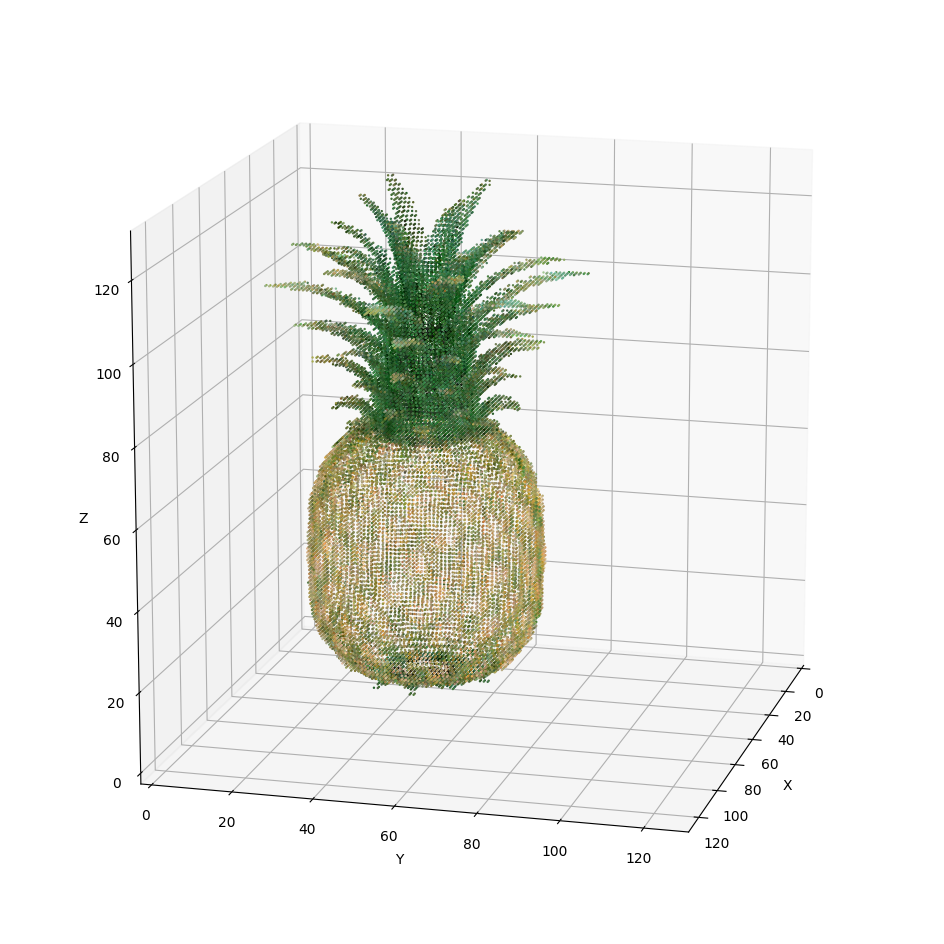

In [98]:
import numpy as np
import cv2

#8*8ずつ
X_out1 = np.zeros((8,8))
X_out2 = np.zeros((8,8))
x_in2 = np.zeros((8,8))
x_in2i = np.zeros((8,8))
x_in1i = np.zeros((8,8))
X_out1i = np.zeros((8,8))
X_out2i = np.zeros((8,8))
nonzeroY = np.array([])
saidaiY = np.array([])
nonzeroCr = np.array([])
saidaiCr = np.array([])
nonzeroCb = np.array([])
saidaiCb = np.array([])

dot = colors.shape[0]

#成分の入れ替え
colors_BGR = colors[:, ::-1]

#実験：小さい範囲に正規化する
#この場合量子化テーブルを小さくする必要がある
#正規化するのはRGBじゃなくてYCrCbのほうがいいかも
colors_BGR = colors_BGR

colors_add = np.zeros((64,3))
colors_BGR = np.concatenate([colors_BGR, colors_add], 0).astype(np.uint8)

#枚数を計算
maisu = dot//64 + 1

#発光デバイスを8*8ごとに分割
colors88 = np.zeros((maisu,8,8,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors88[m,i,j] = colors_BGR[k]
            k = k + 1

#データ形式をuint8に変換
colors88 = colors88.astype(np.uint8)
"""cv2.namedWindow("Image1", cv2.WINDOW_NORMAL)
cv2.imshow("Image1", colors88[dot//64,:,:,:])
cv2.waitKey()"""

#色変換，要素ごとに分割、正規化
for i in range(maisu):
    colors88[i,:,:,:] = cv2.cvtColor(colors88[i,:,:,:], cv2.COLOR_BGR2YCrCb)
Y = colors88[:,:,:,0].astype(np.float16)
Cr = colors88[:,:,:,1].astype(np.float16)
Cb = colors88[:,:,:,2].astype(np.float16)

#変換，量子化
for i in range(maisu):
    Y[i,:,:] = DCT_2D(Y[i,:,:], X_out1, x_in2, X_out2)
    Cr[i,:,:] = DCT_2D(Cr[i,:,:], X_out1, x_in2, X_out2)
    Cb[i,:,:] = DCT_2D(Cb[i,:,:], X_out1, x_in2, X_out2)
    Y[i,:,:] = Y[i,:,:]/tableY
    Cr[i,:,:] = Cr[i,:,:]/tableC
    Cb[i,:,:] = Cb[i,:,:]/tableC
    Y[i,:,:] = Y[i,:,:].astype(np.int32)
    Cr[i,:,:] = Cr[i,:,:].astype(np.int32)
    Cb[i,:,:] = Cb[i,:,:].astype(np.int32)

    saidaiY = np.append(saidaiY, np.amax(Y[i,:,:]))
    saidaiCr = np.append(saidaiCr, np.amax(Cr[i,:,:]))
    saidaiCb = np.append(saidaiCb, np.amax(Cb[i,:,:]))

    nonzeroY = np.append(nonzeroY, (np.count_nonzero(Y[i,:,:])))
    nonzeroCr = np.append(nonzeroCr, (np.count_nonzero(Cr[i,:,:])))
    nonzeroCb = np.append(nonzeroCb, (np.count_nonzero(Cb[i,:,:])))

    #if i == 0:
        #print(Y[0,:,:])
        #print(saidaiY)
        #print(nonzeroY)


#ここからは整数しか使えない
Y = Y.astype(np.int32)
Cr = Cr.astype(np.int32)
Cb = Cb.astype(np.int32)

print(Y[1,:,:])
print(Cr[1,:,:])
print(Cb[1,:,:])

non_zero_counts = np.count_nonzero(Y, axis=(1, 2))
max_index = np.argmax(non_zero_counts)
max_non_zero_count = non_zero_counts[max_index]
print("最も多い要素数を持つ8x8配列のインデックス:", max_index)
print("0でない要素の数:", max_non_zero_count)
"""
plt.hist(non_zero_counts, bins='auto')
plt.xlabel("Non-zero Element Count")
plt.ylabel("Frequency")
plt.title("Histogram of Non-zero Element Counts")
plt.show()"""

#復元
for i in range(maisu):
    Y[i,:,:] = Y[i,:,:]*tableY
    Cr[i,:,:] = Cr[i,:,:]*tableC
    Cb[i,:,:] = Cb[i,:,:]*tableC

for i in range(maisu):
    """if i == 1:
        print(Y[i,:,:])
        print(Cr[i,:,:])
        print(Cb[i,:,:])"""
    Y[i,:,:] = IDCT_2D(Y[i,:,:], X_out1, x_in2, X_out2, i)
    Cr[i,:,:] = IDCT_2D(Cr[i,:,:], X_out1, x_in2, X_out2, i)
    Cb[i,:,:] = IDCT_2D(Cb[i,:,:], X_out1, x_in2, X_out2, i)

Y_recrypt = Y.astype(np.uint8)
Cr_recrypt = Cr.astype(np.uint8)
Cb_recrypt = Cb.astype(np.uint8) 

colors88_recrypt = np.stack([Y_recrypt, Cr_recrypt, Cb_recrypt],-1)

#BGRに変換(ここで乗算が必要になる)
for i in range(maisu):
    colors88_recrypt[i,:,:,:] = cv2.cvtColor(colors88_recrypt[i,:,:,:], cv2.COLOR_YCrCb2BGR)

#8*8から一列に
colors_BGR_recrypt = np.zeros((dot + 64,3))
k = 0
for m in range(maisu):
    for i in range(8):
        for j in range(8):
            colors_BGR_recrypt[k] = colors88_recrypt[m,i,j]
            k = k + 1

#表示できるように
colors_RGB_recrypt = colors_BGR_recrypt[:, ::-1]
colors_RGB_recrypt = colors_RGB_recrypt[0:dot, :]
colors_RGB_recrypt = colors_RGB_recrypt.astype(np.int32)
virtex = virtex_color[:,0:3].astype(np.int32)
virtex_colors_recrypt = np.concatenate([virtex, colors_RGB_recrypt], -1)
colors_recrypt = virtex_colors_recrypt[:,3:6]
colors_recrypt_seikika = colors_recrypt/255

print(np.max(saidaiY))
print(np.max(saidaiCr))
print(np.max(saidaiCb))
print("\n")
print(np.sum(nonzeroY))
print(np.sum(nonzeroCr))
print(np.sum(nonzeroCb))


#像の表示
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(projection='3d')
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
ax.scatter(virtex_colors_recrypt[:,0], virtex_colors_recrypt[:,1], virtex_colors_recrypt[:,2], s = 0.5, c = colors_recrypt_seikika, alpha =1)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

#逆の操作をして元の配列に色を戻して表示する
#DCT量子化後の配列の０でない要素の値の数を調べる